In [2]:
from pycaret.clustering import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\Hazel\\Desktop\\Data Analyst (2024)\\Power BI & ML\\Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Density'>

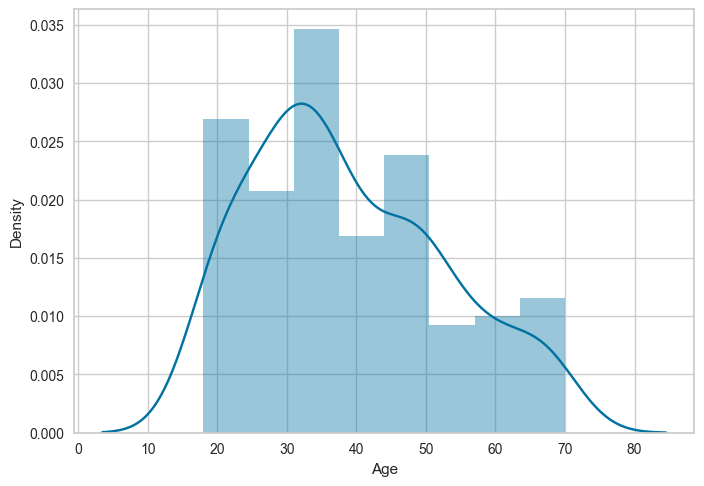

In [5]:
sns.distplot(df['Age'])

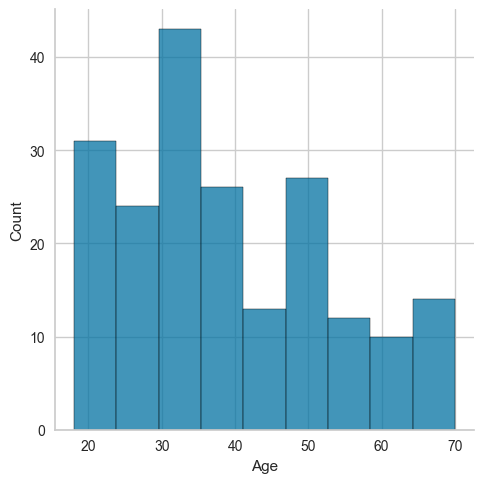

In [13]:
sns.displot(df['Age'])

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

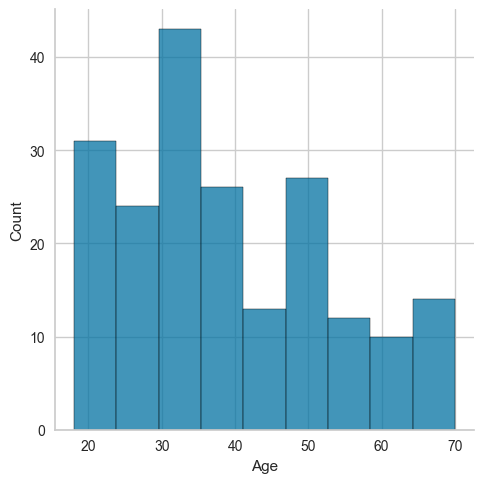

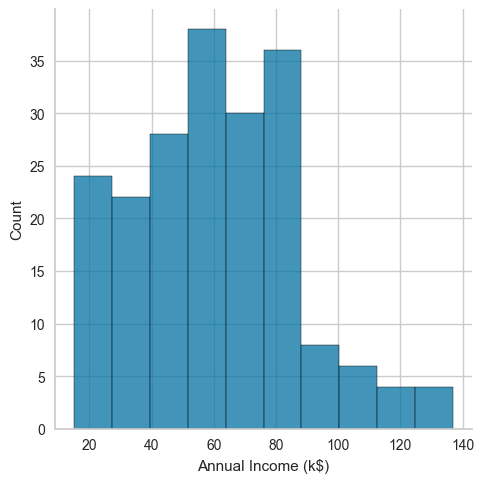

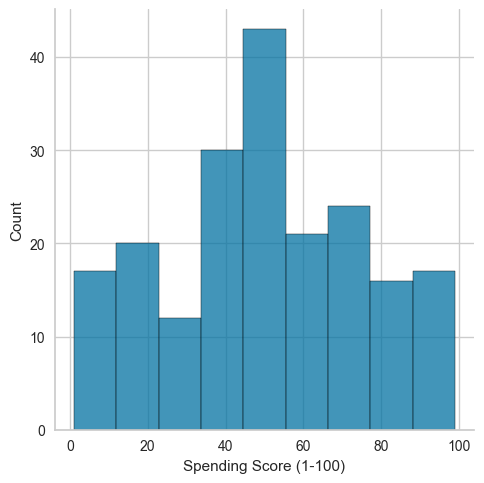

In [18]:
for i in ['Age', 'Annual Income (k$)','Spending Score (1-100)']:
    sns.displot(df[i])

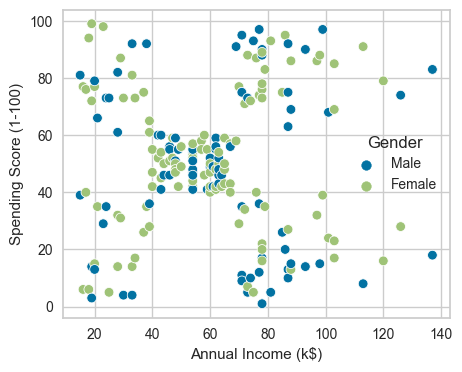

In [7]:
#scatterplot
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],hue=df['Gender']);

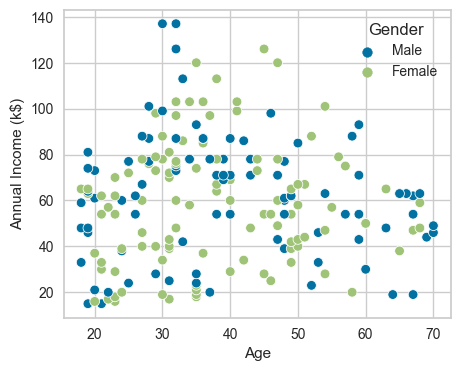

In [8]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'],hue=df['Gender']);

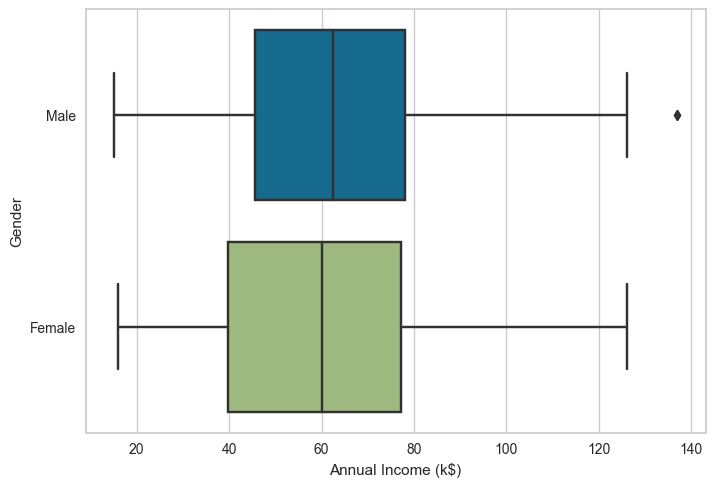

In [9]:
sns.boxplot(x=df['Annual Income (k$)'], y=df['Gender']);

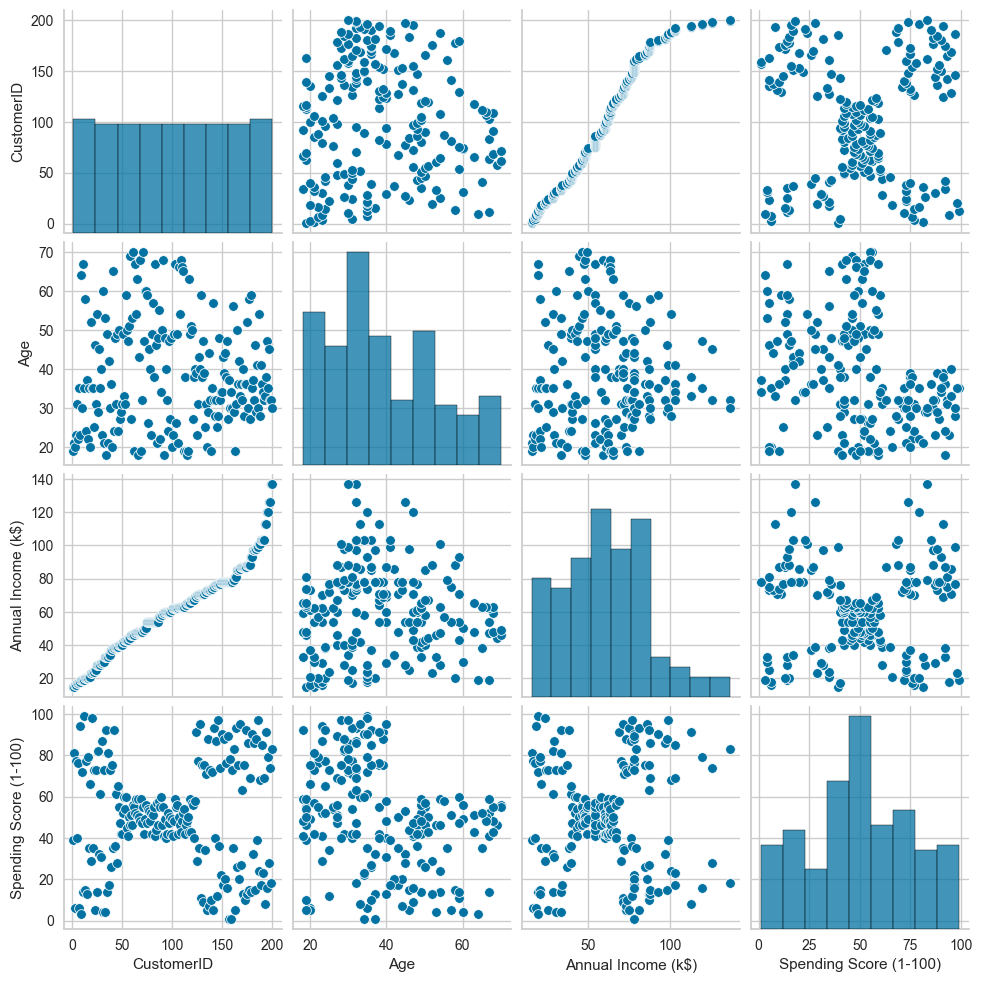

In [10]:
sns.pairplot(df)

In [11]:
setup(df,normalize=True,ignore_features='CustomerID')

,Description,Value
0,Session id,6631
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,10
4,Numeric features,3
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [12]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [13]:
kmeans=create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2882,65.1081,1.2562,0,0,0


In [14]:
print(kmeans)

KMeans(n_clusters=4, random_state=6631)


In [15]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
kmeans_df=assign_model(kmeans)
kmeans_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 3
1,Male,21,15,81,Cluster 3
2,Female,20,16,6,Cluster 2
3,Female,23,16,77,Cluster 2
4,Female,31,17,40,Cluster 2


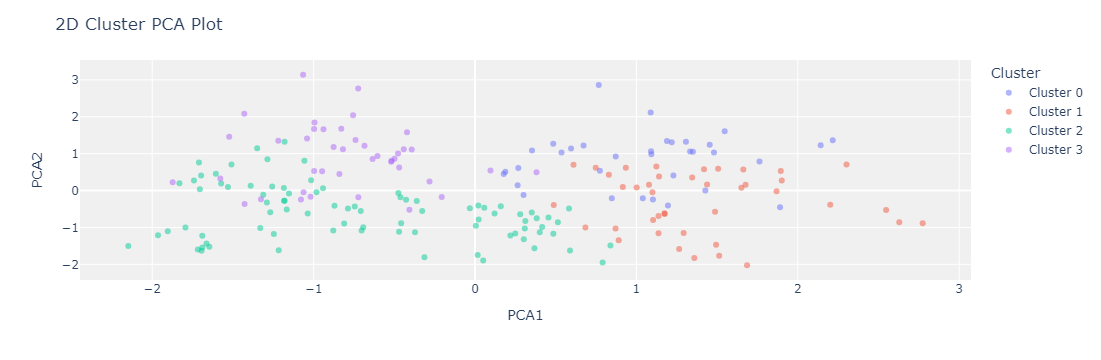

In [17]:
plot_model(kmeans)

In [21]:
save_model(kmeans,'trial_kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                        